In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from collections import Counter
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [2]:
# Q1

data = pd.read_csv('user_profiles_for_ads.csv')
data.isnull().sum() # No Null Value
data = data.drop(['User ID'], axis=1)

In [3]:
# Data Info
data.head() # Checks for first 5 columns
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1000 non-null   object 
 1   Gender                           1000 non-null   object 
 2   Location                         1000 non-null   object 
 3   Language                         1000 non-null   object 
 4   Education Level                  1000 non-null   object 
 5   Likes and Reactions              1000 non-null   int64  
 6   Followed Accounts                1000 non-null   int64  
 7   Device Usage                     1000 non-null   object 
 8   Time Spent Online (hrs/weekday)  1000 non-null   float64
 9   Time Spent Online (hrs/weekend)  1000 non-null   float64
 10  Click-Through Rates (CTR)        1000 non-null   float64
 11  Conversion Rates                 1000 non-null   float64
 12  Ad Interaction Time (

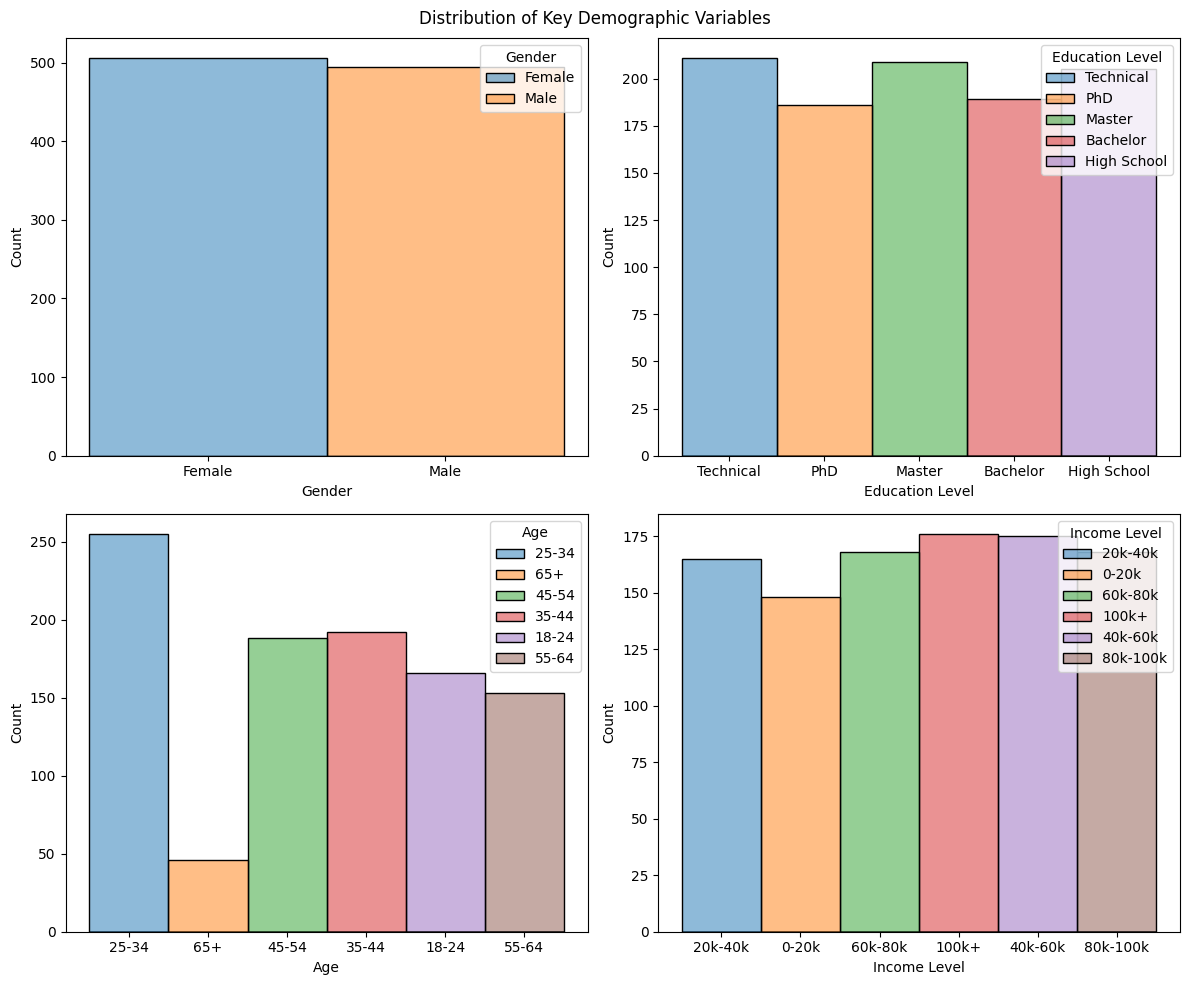

In [4]:
# Q2

fig, axis = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Distribution of Key Demographic Variables")
sns.histplot(data, x='Gender', hue='Gender', ax=axis[0,0])
sns.histplot(data, x='Education Level', hue='Education Level', ax=axis[0,1])
sns.histplot(data, x='Age', hue='Age', ax=axis[1,0])
sns.histplot(data, x='Income Level', hue='Income Level', ax=axis[1,1])
fig.tight_layout()

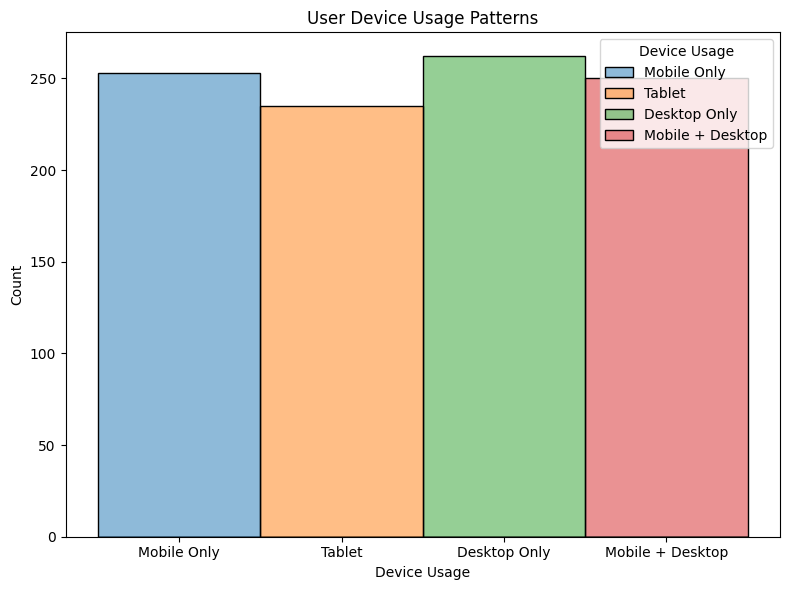

In [5]:
# Q3

plt.figure(figsize=(8, 6))
sns.histplot(data, x='Device Usage', hue='Device Usage')
plt.title("User Device Usage Patterns")
plt.tight_layout()

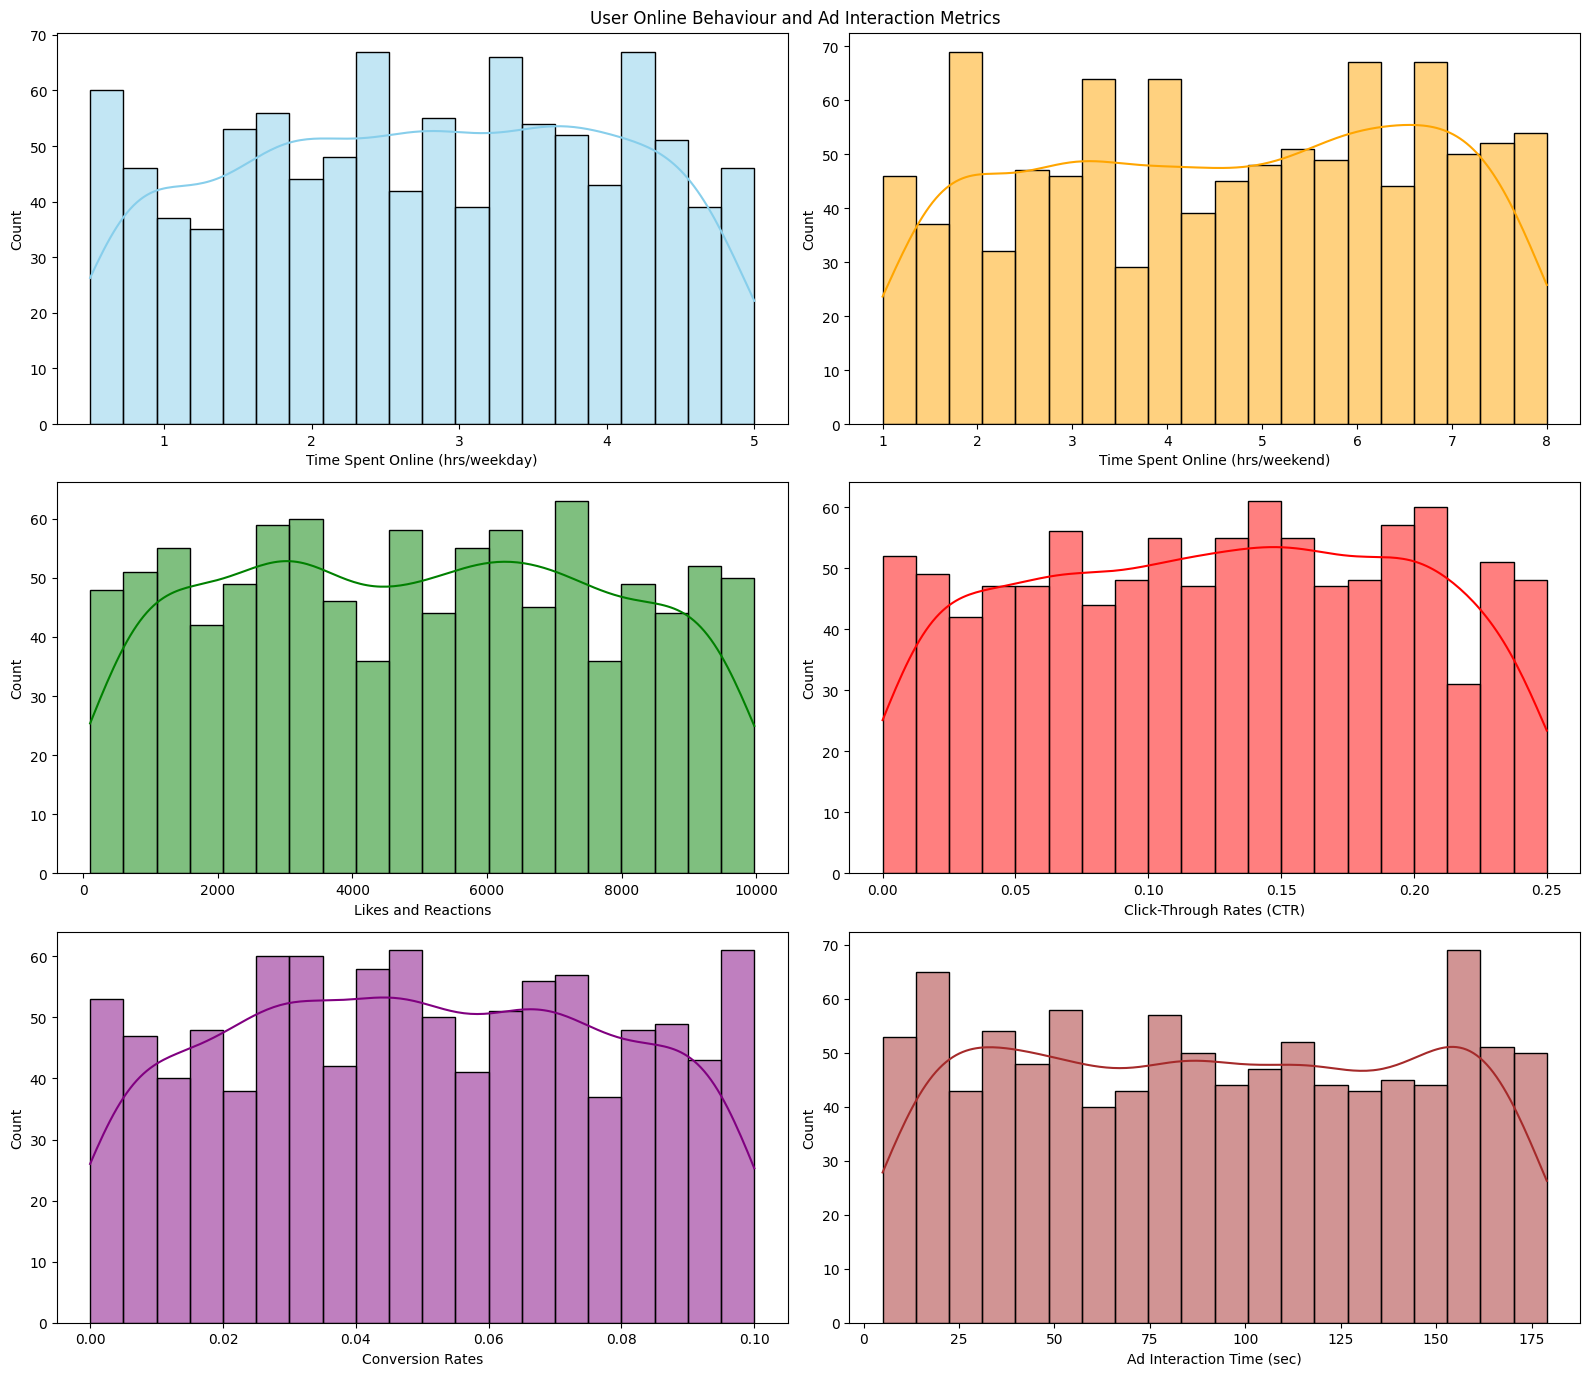

In [6]:
# Q4

fig, axis = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle("User Online Behaviour and Ad Interaction Metrics")
sns.histplot(data, x='Time Spent Online (hrs/weekday)', ax=axis[0,0], bins=20, kde=True, color='skyblue')
sns.histplot(data, x='Time Spent Online (hrs/weekend)', ax=axis[0,1], bins=20, kde=True, color='orange')
sns.histplot(data, x='Likes and Reactions', ax=axis[1,0], bins=20, kde=True, color='green')
sns.histplot(data, x='Click-Through Rates (CTR)', ax=axis[1,1], bins=20, kde=True, color='red')
sns.histplot(data, x='Conversion Rates', ax=axis[2,0], bins=20, kde=True, color='purple')
sns.histplot(data, x='Ad Interaction Time (sec)', ax=axis[2,1], bins=20, kde=True, color='brown')
fig.tight_layout()

In [7]:
# Q5

interests = data['Top Interests'].str.split(', ').sum()
interestsCount = Counter(interests)
# interestsDF = pd.DataFrame(interestsCount.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)
interestsDF = pd.DataFrame(interestsCount.items(), columns=['Interest', 'Frequency']).sort_values(by='Frequency', ascending=False)

interestsDF

,Interest,Frequency
0,Digital Marketing,182
5,Investing and Finance,171
7,Music Production,169
2,Fitness and Wellness,167
10,Eco-Friendly Living,163
13,Fashion Modelling,161
8,Gourmet Cooking,157
14,Reading and Literature,156
3,Gaming,155
15,Pet Care,155


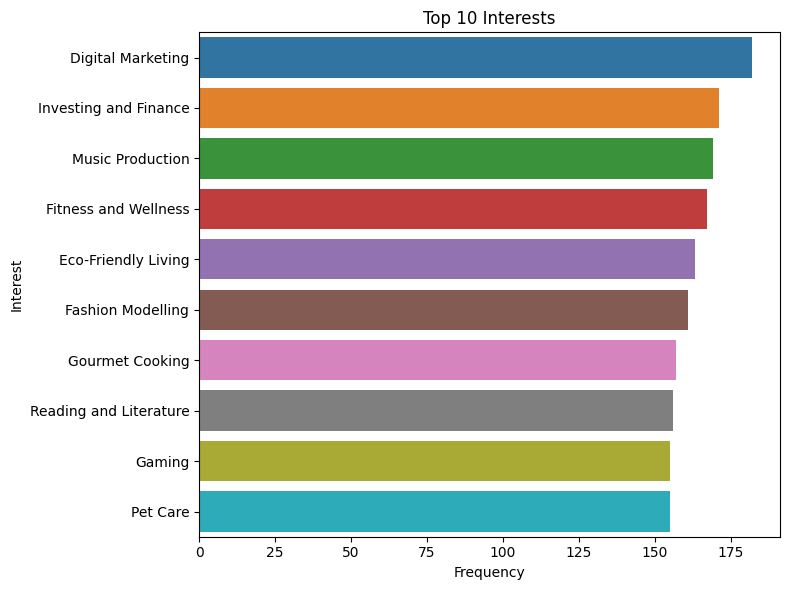

In [8]:
# Plot for top 10 Interests

plt.figure(figsize=(8, 6))
sns.barplot(data=interestsDF.head(10), x='Frequency', y='Interest', hue='Interest')
plt.title("Top 10 Interests")
plt.tight_layout()

In [14]:
# Q6

# Selected Features
feat = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
features = data[feat]

# Dividing features into Numerical and Categorical
numFeat = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
catFeat = ['Age', 'Gender', 'Income Level']

# Transformations for Features
numTransformer = StandardScaler()
catTransformer = OneHotEncoder()

# Preprocessing Data
preprocessor = ColumnTransformer(transformers=[
    ('num', numTransformer, numFeat),
    ('cat', catTransformer, catFeat)
])

# Model Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('cluster', KMeans(n_clusters=5))
])

pipeline.fit(features)

d:\Softwares\Miniconda\envs\py8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Time Spent Online '
                                                   '(hrs/weekday)',
                                                   'Time Spent Online '
                                                   '(hrs/weekend)',
                                                   'Likes and Reactions',
                                                   'Click-Through Rates '
                                                   '(CTR)']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Age', 'Gender',
                                                   'Income Level'])])),
                ('cluster', KMeans(n_clusters=5))])

In [15]:
# Get Predicted Clusters
clusters = pipeline.named_steps['cluster'].labels_
data['Cluster'] = clusters
data.head()

,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,Cluster
0,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing,4
1,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science,2
2,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness,0
3,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts",3
4,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G...",4


In [16]:
# Q7

# Computing Cluster Mean values
CMean = data.groupby('Cluster')[numFeat].mean()

for feature in catFeat:
    CMode = data.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    CMean[feature] = CMode

CMean

,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Likes and Reactions,Click-Through Rates (CTR),Age,Gender,Income Level
Cluster,,,,,,,
0,3.916346,4.475962,2199.629808,0.152788,25-34,Female,60k-80k
1,1.779426,4.335885,3505.086124,0.049746,25-34,Male,0-20k
2,1.654857,5.982857,4645.571429,0.180800,25-34,Male,80k-100k
3,3.501070,6.124599,7365.620321,0.087128,25-34,Female,100k+
4,2.835747,2.588688,7315.167421,0.159380,25-34,Male,20k-40k


In [20]:
# Q8

Featplot = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
labels = np.array(Featplot)

# Dataframe for the Radar chart
chartDF = CMean[Featplot].reset_index()

# normalizing the data
chartDFNorm = chartDF.copy()
for feature in Featplot:
    chartDFNorm[feature] = (chartDF[feature] - chartDF[feature].min()) / (chartDF[feature].max() - chartDF[feature].min())

chartDFNorm = pd.concat([chartDFNorm, chartDFNorm.iloc[[0]]], ignore_index=True)

# Segment Names
segment_names = ['Weekend Warriors', 'Engaged Professionals', 'Low-Key Users', 'Active Explorers', 'Budget Browsers']

In [24]:
# Q9

fig = go.Figure()

# Initialize a new figure for the radar chart
fig = go.Figure()

# Iterate over each user segment to plot their profiles
for i, segment in enumerate(segment_names):
    fig.add_trace(go.Scatterpolar(
        r=chartDFNorm.iloc[i][Featplot].tolist() + [chartDFNorm.iloc[i][Featplot][0]],  # Close the radar chart by repeating the first value
        theta=labels.tolist() + [labels[0]],  # Close the radar chart by repeating the first label
        fill='toself',
        name=segment,
        hoverinfo='text',
        text=[f"{label}: {value:.2f}" for label, value in zip(Featplot, chartDFNorm.iloc[i][Featplot])]+[f"{labels[0]}: {chartDFNorm.iloc[i][Featplot][0]:.2f}"]  # Add hover text for each feature
    ))

# Customize the layout for better visualization
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True,
    title='User Segments Profile'
)

In [25]:
# Q10
# Summary

"""

I did a comprehensive analysis of user profiles for targeted advertising. Initially, the dataset is read and preprocessed by removing the 'User ID' column.
The methodology involves visualizing demographic variables, device usage patterns, and online behavior through histograms. 
The analysis further includes identifying the top user interests and visualizing them using a bar plot.

For clustering, selected features are divided into numerical and categorical groups, transformed, and fed into a KMeans model to identify five user segments. 
The mean values of these features are computed for each cluster, and a radar chart is generated to profile the identified user segments, labeled as 
'Weekend Warriors', 'Engaged Professionals', 'Low-Key Users', 'Active Explorers', and 'Budget Browsers'.

The Main Challenge is to get identical clusters as presented in the task screenshot and according to the given cluster segment specifications.
Clusters I got aren't the same, but might be close to those expected.
Next challenge was to plot the Radar Chart, which is difficult to configure than normal plots, however it was a good experience overall. 

"""

"\n\nI did a comprehensive analysis of user profiles for targeted advertising. Initially, the dataset is read and preprocessed by removing the 'User ID' column.\nThe methodology involves visualizing demographic variables, device usage patterns, and online behavior through histograms. \nThe analysis further includes identifying the top user interests and visualizing them using a bar plot.\n\nFor clustering, selected features are divided into numerical and categorical groups, transformed, and fed into a KMeans model to identify five user segments. \nThe mean values of these features are computed for each cluster, and a radar chart is generated to profile the identified user segments, labeled as \n'Weekend Warriors', 'Engaged Professionals', 'Low-Key Users', 'Active Explorers', and 'Budget Browsers'.\n\nThe Main Challenge is to get identical clusters as presented in the task screenshot and according to the given cluster segment specifications.\nClusters I got aren't the same, but might be